In [1]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('monitor_your_balance.csv')

In [3]:
df.dropna(axis=1, how='all', inplace=True)

In [4]:
df

,timestamp,total,USDT
0,1.669827e+09,133.975765,USDT
1,1.669827e+09,134.028890,USDT
2,1.669827e+09,134.029878,USDT
3,1.669828e+09,134.043910,USDT
4,1.669828e+09,134.058642,USDT
...,...,...,...
1563,1.670690e+09,136.020964,USDT
1564,1.670690e+09,136.025266,USDT
1565,1.670691e+09,135.993571,USDT
1566,1.670691e+09,136.010656,USDT


In [5]:
hours = 500  # 24+24+15
now = datetime.now()
back = now - timedelta(hours=hours)
back_timestamp = int(back.timestamp())
print(f'now: {now} minus hours: {hours} is back time: {back}\nback timestamp is {back_timestamp}')

now: 2022-12-10 18:04:29.058311 minus hours: 500 is back time: 2022-11-19 22:04:29.058311
back timestamp is 1668891869


In [6]:
df = df[df.timestamp>back_timestamp]

In [7]:
df['date_time'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.set_index('date_time')
columns =['total']
df = df[columns]

<AxesSubplot:xlabel='date_time'>

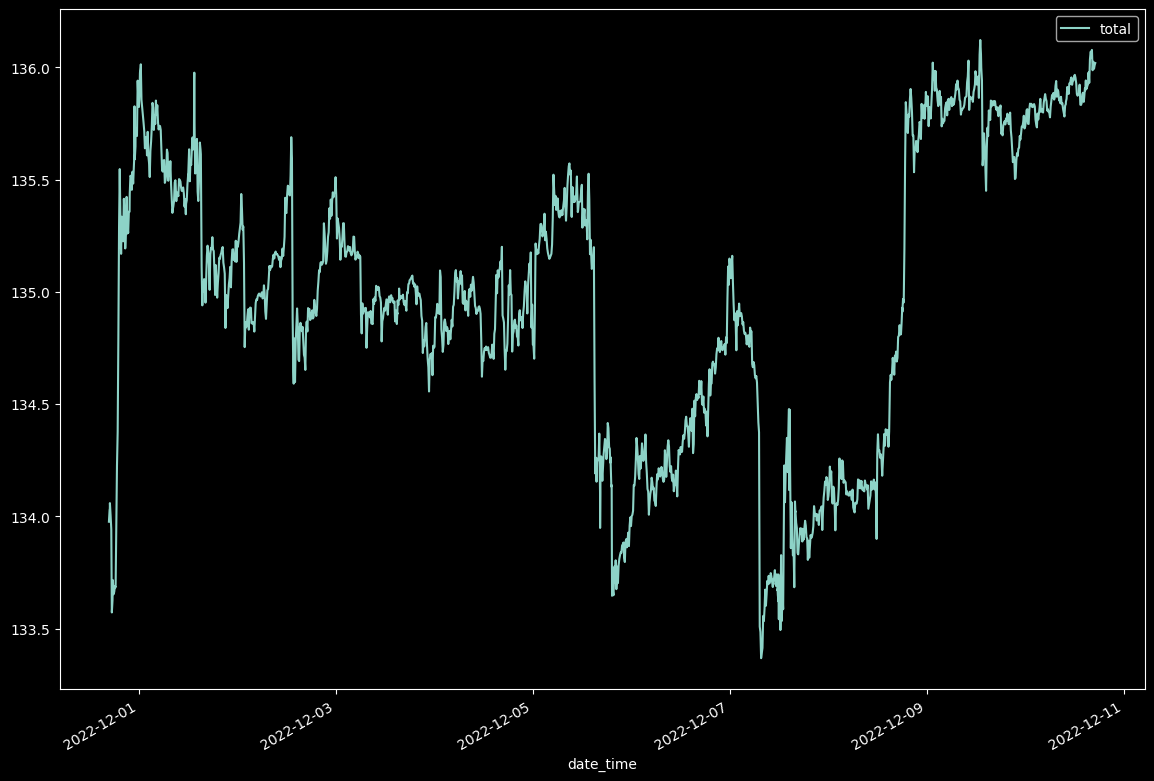

In [8]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (14, 10)
df.plot()